In [18]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/lilifang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lilifang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
df= pd.read_excel('All interviewees responses and the corresponding representative words_withoutNONE_updated.xlsx')
print(df.columns)

Index(['ids', 'diagnosis', 'section', 'pilot_number', 'inter_time', 'response',
       'LIWC_response', 'new_response', 'Topic most represented',
       'Topic and its most representative words'],
      dtype='object')


In [20]:
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords = ["um", "oh", "okay", "mhm","ah","uh","yes","get",'yep',"yeah","no","hm","wow",'.','?','-','--',':','mm','Mm','Oop']
stopwords.extend(new_stopwords)

In [21]:
from nltk.tokenize import word_tokenize

In [22]:
df['sep_response']=df['new_response'].str.lower().apply(lambda x: word_tokenize(x))

In [23]:
df['words_count'] = df['new_response'].str.split().str.len()

In [24]:
df=df.dropna(subset=['response'])
print(df.shape)

(14201, 12)


In [25]:
df['response_without_stopwords']= df['sep_response'].apply(lambda x: [word for word in x if word not in (stopwords)])

In [26]:
# import these modules
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


In [27]:
from nltk.stem import PorterStemmer 
# create an object of class PorterStemmer
porter = PorterStemmer()
print(porter.stem("play"))
print(porter.stem("playing"))
print(porter.stem("plays"))
print(porter.stem("played"))

play
play
play
play


In [28]:
display(df.tail(20))

,ids,diagnosis,section,pilot_number,inter_time,response,LIWC_response,new_response,Topic most represented,Topic and its most representative words,sep_response,words_count,response_without_stopwords
14181,4292,ASD.ADHD,Icebreaker,Pilot13_03_03_2022,[00:03:23],That's fine.,NaN,fine,11,"11: talk, friend, peopl, someon, much, convers...",[fine],1,[fine]
14182,7915,ADHD,Feedback,175_27_04_2022,[01:24:57],I talk to a lot of kids in the play area and I...,talk lot kids play control control good,talk lot kid play area control littl bit contr...,11,"11: talk, friend, peopl, someon, much, convers...","[talk, lot, kid, play, area, control, littl, b...",11,"[talk, lot, kid, play, area, control, littl, b..."
14183,8793,ADHD,Activity Three,470_24_06_2022,[010816],Its just like when I constantly keep talking a...,talking everyone annoyed calm,like constantli keep talk everyon get annoy st...,11,"11: talk, friend, peopl, someon, much, convers...","[like, constantli, keep, talk, everyon, get, a...",9,"[like, constantli, keep, talk, everyon, annoy,..."
14184,6325,ADHD,Activity Three,917_29_06_2022,[00:23:52],Yes. Yes. That has happened to me. So basicall...,we supposed they told us you really sir becaus...,happen basic suppos normal day got told three ...,11,"11: talk, friend, peopl, someon, much, convers...","[happen, basic, suppos, normal, day, got, told...",31,"[happen, basic, suppos, normal, day, got, told..."
14185,7820,ADHD,Activity Three,175_27_04_2022,[00:51:04],Meeting people.,NaN,meet peopl,11,"11: talk, friend, peopl, someon, much, convers...","[meet, peopl]",2,"[meet, peopl]"
14186,17079,ASD.ADHD,Activity Four,005_03_05_2022,[010403],A couple of them in the blue zone I can talk a...,them blue talk,coupl blue zone talk,11,"11: talk, friend, peopl, someon, much, convers...","[coupl, blue, zone, talk]",4,"[coupl, blue, zone, talk]"
14187,136,ASD.ADHD,Activity Two,974_16_06_2022,[00:48:46],The only one I would -- I think I've already s...,would think talking others can't seem,one would think alreadi sort get hyper focus t...,11,"11: talk, friend, peopl, someon, much, convers...","[one, would, think, alreadi, sort, get, hyper,...",13,"[one, would, think, alreadi, sort, hyper, focu..."
14188,6371,ADHD,Activity Three,917_29_06_2022,[00:37:13],Other people just ignore me. But then my frien...,people ignore friends tell,peopl ignor friend tell quick breather,11,"11: talk, friend, peopl, someon, much, convers...","[peopl, ignor, friend, tell, quick, breather]",6,"[peopl, ignor, friend, tell, quick, breather]"
14189,7853,ADHD,Activity Four,175_27_04_2022,[01:02:48],Because he isn't getting trouble and he is bri...,he isn't he other friend called,get troubl bring student friend call,11,"11: talk, friend, peopl, someon, much, convers...","[get, troubl, bring, student, friend, call]",6,"[troubl, bring, student, friend, call]"
14190,6431,ADHD,Feedback,917_29_06_2022,[00:52:35],No not really. We just talk about anything.,not talk,realli talk anyth,11,"11: talk, friend, peopl, someon, much, convers...","[realli, talk, anyth]",3,"[realli, talk, anyth]"


In [29]:
display(df['words_count'].head())

0     1
1     2
2    16
3     1
4     1
Name: words_count, dtype: int64

In [31]:
ndf= df.groupby('words_count',as_index=False).count()
display(ndf[['words_count','new_response','response_without_stopwords']])

,words_count,new_response,response_without_stopwords
0,1,1582,1582
1,2,1594,1594
2,3,1402,1402
3,4,1261,1261
4,5,978,978
...,...,...,...
83,99,2,2
84,104,1,1
85,107,1,1
86,120,1,1


In [50]:
sum_new_response = sum(ndf['new_response'])
print(sum_new_response)


14201


In [51]:
ndf['percentage'] = ndf['new_response'].div(14201).round(2)

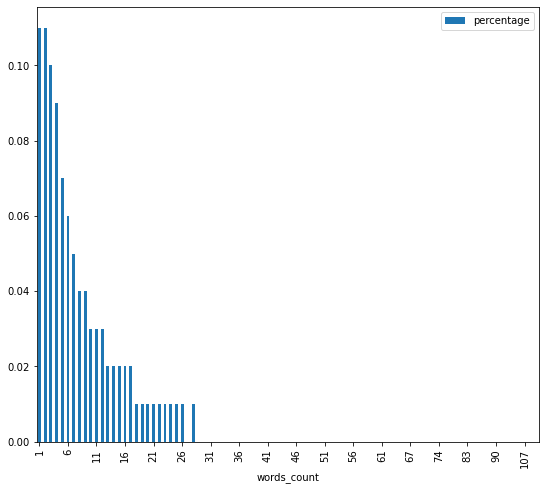

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ndf.plot(x="words_count", y=["percentage"], kind="bar", figsize=(9, 8))
# print bar graph
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

In [33]:
print(df.columns)

Index(['ids', 'diagnosis', 'section', 'pilot_number', 'inter_time', 'response',
       'LIWC_response', 'new_response', 'Topic most represented',
       'Topic and its most representative words', 'sep_response',
       'words_count', 'response_without_stopwords'],
      dtype='object')


In [45]:
short_df = df[df['words_count']==3]
print(short_df.shape)

(1402, 13)


In [46]:
short_response = set(short_df['new_response'])

In [47]:
new_f = open('short_response_equals_3V2.csv','wt')
for item in short_response:
    new_f.write(str(item)+'\n')
    